# 1. Cyber Threat Intelligence Reports
## Data Description

- Text: Security advisories, cybersecurity bulletins, threat intelligence feeds describing malicious actors, attack vectors, and vulnerabilities.
- Possible Sources: Internal reports from government security agencies, aggregated open-source threat intelligence.
Best Visualization: Dependency Parse + Named Entity Relationship Graph

Why?
- Cyber threat intelligence text often contains relationships between threat actor groups, techniques, and vulnerabilities.
- Extracting named entities (e.g., threat actor names, CVE identifiers, software names) with spaCy’s NER, then visualizing how these entities relate to each other with a graph (e.g., using networkx or pyVis) can reveal the structure of emerging threats.
- Additionally, a dependency parse diagram (via displacy) can help analysts see how certain keywords (“exploit,” “payload,” “CVE-2024-XXXX,” etc.) connect in each sentence.
Less Effective Visualization: Simple Word Cloud

Why Not?
- While word clouds can show frequently used terms, they fail to capture relationships, context, or the specific types of entities that are crucial in threat intel.
- Frequent words like “attack,” “malware,” “threat” may dominate the cloud but provide little actionable insight into who attacked and how.

In [3]:
!pip install networkx --quiet


[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


# 2. Public Health Bulletins and Outbreak Updates
Data Description

Text: Government public health announcements, disease outbreak reports, vaccine updates.
Possible Sources: CDC bulletins, WHO situation reports, local government health department updates.
Best Visualization: Temporal Entity Timeline

Why?
Outbreak communications often revolve around when certain events happen (detection of the first case, new variant discovered, vaccination drive launch).
Extracting time expressions, named entities (diseases, locations, organizations), and then plotting them on a timeline (e.g., Plotly timeline charts) helps visualize the chronological evolution of an outbreak.
Less Effective Visualization: Plain Dependency Parse

Why Not?
While dependency parses are useful for sentence structure, they don’t inherently convey temporal trends across multiple documents.
Focusing solely on dependency trees for each announcement might overwhelm and distract from the critical timeline perspective.

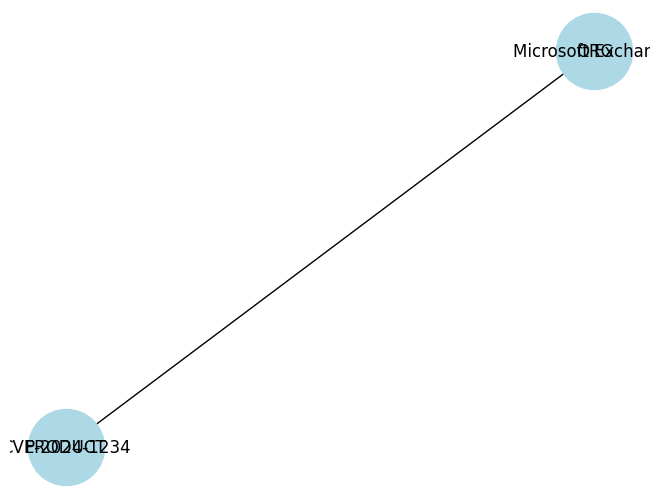

In [4]:
import spacy
from spacy import displacy
import networkx as nx
import matplotlib.pyplot as plt

# 1. Load spaCy model
nlp = spacy.load("en_core_web_sm")

# 2. Sample text (cyber threat intelligence)
text = """
APT28 group exploited CVE-2024-1234 in Microsoft Exchange, 
gaining unauthorized access to classified documents. 
They subsequently deployed a payload that exfiltrated data to a remote server.
"""

doc = nlp(text)

# 3. Visualize dependencies using displacy
displacy.render(doc, style='dep', jupyter=True)

# 4. Build a simple Named Entity Graph
entities = [(ent.text, ent.label_) for ent in doc.ents]

# Create a graph and add nodes for each entity
G = nx.Graph()
for ent_text, ent_label in entities:
    G.add_node(ent_text, label=ent_label)

# Example of adding edges (naive approach: connect consecutive entities)
for i in range(len(entities)-1):
    G.add_edge(entities[i][0], entities[i+1][0])

# 5. Draw the graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=3000, node_color='lightblue')
labels = nx.get_node_attributes(G, 'label')
nx.draw_networkx_labels(G, pos, labels)
plt.show()


# 2. Public Health Bulletins and Outbreak Updates
Data Description

Text: Government public health announcements, disease outbreak reports, vaccine updates.
Possible Sources: CDC bulletins, WHO situation reports, local government health department updates.
Best Visualization: Temporal Entity Timeline

Why?
Outbreak communications often revolve around when certain events happen (detection of the first case, new variant discovered, vaccination drive launch).
Extracting time expressions, named entities (diseases, locations, organizations), and then plotting them on a timeline (e.g., Plotly timeline charts) helps visualize the chronological evolution of an outbreak.
Less Effective Visualization: Plain Dependency Parse

Why Not?
While dependency parses are useful for sentence structure, they don’t inherently convey temporal trends across multiple documents.
Focusing solely on dependency trees for each announcement might overwhelm and distract from the critical timeline perspective.

In [6]:
import spacy
from spacy.matcher import Matcher
import matplotlib.pyplot as plt
import pandas as pd

nlp = spacy.load("en_core_web_sm")

# Sample text with date references
text = """
On January 2, 2025, the first case of the X-32 variant was reported in Springfield.
By January 5, 2025, local hospitals noticed an uptick in admissions.
On January 10, 2025, a mass vaccination drive began.
"""

doc = nlp(text)

# Extract dates (spaCy 'DATE' entity)
dates = [ent.text for ent in doc.ents if ent.label_ == 'DATE']
events = [sent.text for sent in doc.sents]

# For demonstration: pair each date with the closest event
timeline_data = list(zip(dates, events))

# Convert to DataFrame
df = pd.DataFrame(timeline_data, columns=["Date", "Event"])
# In real use, parse dates properly into datetime objects, etc.

# Plot or build a timeline (placeholder example)
for index, row in df.iterrows():
    print(f"{row['Date']}: {row['Event']}")
# You'd typically use a timeline library or Gantt chart library for a proper visualization


January 2, 2025: 
On January 2, 2025, the first case of the X-32 variant was reported in Springfield.

January 5, 2025: By January 5, 2025, local hospitals noticed an uptick in admissions.

January 10, 2025: On January 10, 2025, a mass vaccination drive began.



# 3. Legislative Bills and Policy Documents
Data Description

Text: Full or partial text of legislative bills, policy proposals, or executive orders.
Possible Sources: Government legislative websites, open data portals, or any synthetic text that mimics official documents.
Best Visualization: Hierarchical Topic Modeling & Document Segmentation

Why?
Legislative bills are long and often have multiple sections/sub-sections.
Using spaCy for text segmentation (finding headings, sections) combined with topic modeling (e.g., using something like gensim or BERTopic) can yield a hierarchical visualization (like a tree or sunburst chart) showing top-level topics, subtopics, and relevant sections.
This helps policy analysts see how the bill is organized and what each section covers.
Less Effective Visualization: Simple NER Highlighting

Why Not?
Named Entity Recognition alone can highlight references to organizations, places, and persons, but legislative text is usually more about structure, sections, and topics than about identifying named entities.
Just highlighting entities doesn’t capture the “hierarchy” or how the entire document is composed.
Example Workflow (High-Level)
Segment the document into sections (using regex on headings or rules).
Run spaCy on each section.
Apply topic modeling (e.g., BERTopic) to group sections into coherent topics.
Visualize the hierarchy with a Sunburst chart where each ring is a deeper level of subtopics.

In [14]:
# Pseudocode sketch
import spacy
from bertopic import BERTopic

nlp = spacy.load("en_core_web_sm")

text = """Section 1: Infrastructure funding...
          Section 2: Education grants...
          Section 3: National security measures...
       """
# 1. Segment text by "Section X"
sections = text.split("Section")

docs = []
for section in sections:
    section_text = section.strip()
    if section_text:
        doc = nlp(section_text)
        docs.append(section_text)

# 2. Topic modeling with BERTopic
topic_model = BERTopic()
topics, _ = topic_model.fit_transform(docs)

# 3. Plot a hierarchical topic visualization
topic_model.visualize_hierarchy()


2025-01-09 21:18:11.283982: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-01-09 21:18:12.735910: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1736457493.126851     288 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1736457493.217544     288 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-09 21:18:14.501448: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

RuntimeError: Failed to import transformers.integrations.integration_utils because of the following error (look up to see its traceback):
Failed to import transformers.modeling_tf_utils because of the following error (look up to see its traceback):
Your currently installed version of Keras is Keras 3, but this is not yet supported in Transformers. Please install the backwards-compatible tf-keras package with `pip install tf-keras`.

# 4. Social Media Posts from Official Government Accounts
Data Description

Text: Tweets, Facebook posts, or threads from official government accounts.
Possible Sources: Public-facing social media channels of agencies, local government, or synthetic dataset.
Best Visualization: Entity Co-occurrence Network + Sentiment Overlay

Why?
Social media often features multiple mentions: agencies, programs, hashtags, events.
Building a co-occurrence network of named entities (e.g., #Healthcare, #Infrastructure, “Department of Transportation”) highlights how various topics are interlinked.
Color-code edges or nodes by sentiment (positive/negative/neutral) to reveal the overall public reception or stance in each conversation.
Less Effective Visualization: Pie Chart of Sentiments

Why Not?
A pie chart showing proportions of sentiments can be superficially helpful, but fails to show how topics or entities connect.
Social media conversation is about networks of ideas, not just overall positivity/negativity.

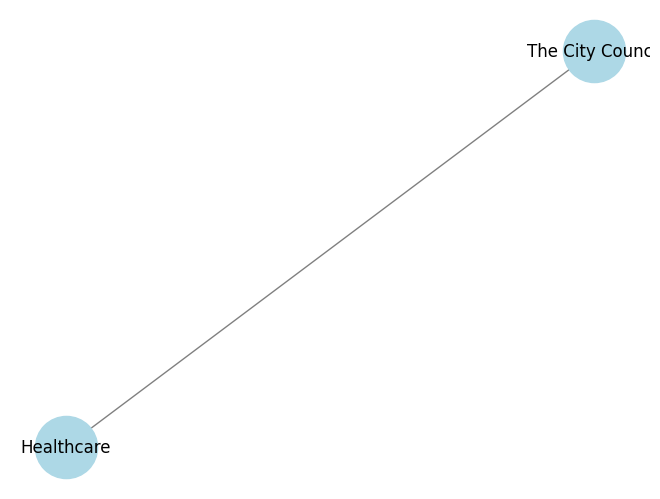

In [11]:
import spacy
from textblob import TextBlob
import networkx as nx
import matplotlib.pyplot as plt

nlp = spacy.load("en_core_web_sm")

sample_posts = [
    "The Department of Transportation launched a new #Infrastructure project!",
    "The City Council passed a resolution to increase #Healthcare funding.",
    "#Healthcare is trending due to the Governor’s new initiative."
]

# Extract entity co-occurrence + sentiment
G = nx.Graph()

for post in sample_posts:
    doc = nlp(post)
    sentiment = TextBlob(post).sentiment.polarity
    entities = [ent.text for ent in doc.ents]
    
    # If multiple entities in a post, link them
    for i in range(len(entities)):
        for j in range(i+1, len(entities)):
            e1, e2 = entities[i], entities[j]
            if not G.has_edge(e1, e2):
                G.add_edge(e1, e2, weight=1, sentiment=sentiment)
            else:
                # Possibly update weight/sentiment
                G[e1][e2]['weight'] += 1

# Visualize
pos = nx.spring_layout(G, k=2)
edge_colors = []
for (u, v, d) in G.edges(data=True):
    # Color the edge based on sentiment
    if d['sentiment'] > 0:
        edge_colors.append('green')
    elif d['sentiment'] < 0:
        edge_colors.append('red')
    else:
        edge_colors.append('gray')

nx.draw(G, pos, with_labels=True, edge_color=edge_colors, node_color='lightblue', node_size=2000)
plt.show()


# 5. Freedom of Information Act (FOIA) Request Summaries
Data Description

Text: Summaries of FOIA requests, describing the type of information sought and the agencies involved.
Possible Sources: Synthetic text describing requests or actual FOIA reading room summaries.
Best Visualization: Customized SpaCy “Displacy” Visual with Additional Metadata

Why?
FOIA requests often involve agencies, requesters, topics, and justifications.
A custom displacy HTML rendering can highlight not only named entities but also add overlays for each entity indicating request status (“pending,” “completed,” “denied”), possibly with color-coded labels.
This gives immediate insight into what is being requested and from whom, as well as the status of each request, in a single view.
Less Effective Visualization: Bar Chart of Request Counts by Agency

Why Not?
Although it can show which agencies are requested most often, it loses granularity (e.g., why requests are made, which specific topics are requested).
FOIA text is often about the detailed context, and an aggregated bar chart won’t show that detail.

In [8]:
import spacy
from spacy import displacy

nlp = spacy.load("en_core_web_sm")

text = """
Request #1234: John Doe requests documents regarding environmental impact reports 
from the Environmental Protection Agency. Status: Pending

Request #5678: Jane Smith requests communications about budget allocation 
from the Department of Defense. Status: Denied
"""

doc = nlp(text)

# Custom rendering with metadata
colors = {"ORG": "linear-gradient(90deg, #aa9cfc, #fc9ce7)"}

options = {
    "ents": ["PERSON", "ORG"],
    "colors": colors
}

html = displacy.render(doc, style='ent', options=options, jupyter=False)
# Post-process or embed status info in the HTML (e.g., adding badges after each recognized entity)
# For a real example, you'd parse out "Status: X" as additional data and conditionally color-code it.

# Display in a Jupyter Notebook environment or write to an HTML file.
with open("foia_requests.html", "w") as f:
    f.write(html)


In [10]:
!pip install textblob

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 626.3/626.3 kB 7.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 14.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 780.9/780.9 kB 16.1 MB/s eta 0:00:0000:01

[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [13]:
!pip install bertopic

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.7/143.7 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 24.8 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 20.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 17.9 MB/s eta 0:00:0000:010:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 450.7/450.7 kB 18.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 906.5/906.5 MB 886.3 kB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 19.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.9/43.9 MB 15.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 22.4 MB/